In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Reading Data

In [31]:
data=  pd.read_csv("/kaggle/input/test-file/tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data info

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Duplicated values

In [33]:
data.duplicated().sum()

0

# Null Values

In [34]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Fare distribution

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

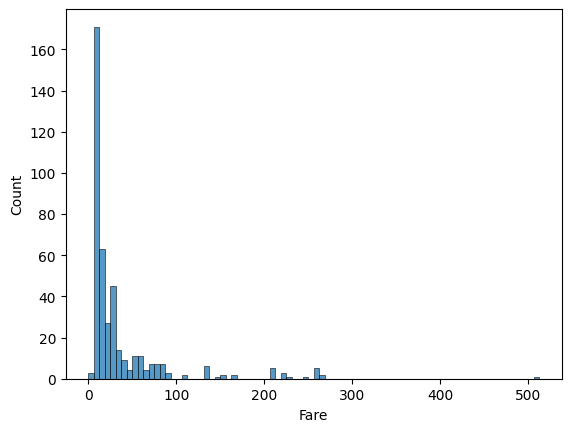

In [35]:
sns.histplot(data["Fare"])
data["Fare"].describe()
# the graph is right skewed and so the mean is greater than meedian, therefore we 
#fill missing values with median in fare columns.


# Age distribution 

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

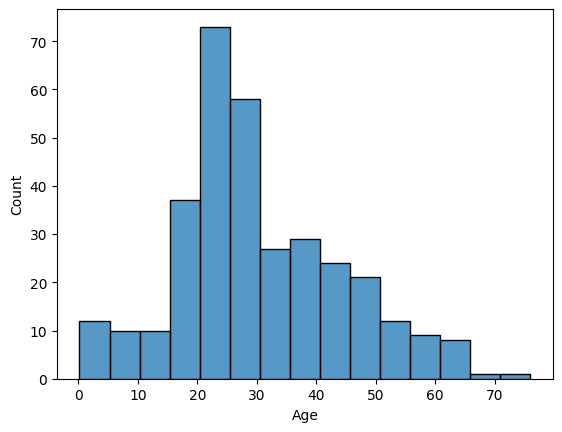

In [36]:
sns.histplot(data["Age"])
data["Age"].describe()
# the graph is right skewed and so the mean is greater than meedian, therefore we 
#fill missing values with median in age columns.

# filling null values with median in Fare and Age

In [37]:
data["Age"].fillna(data["Age"].median(), inplace = True)
data["Fare"].fillna(data["Fare"].median(), inplace = True)



In [38]:
data["Cabin"].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

# filling null values with "Unkown" in Cabin column

In [39]:
data["Cabin"].fillna("Unknown", inplace = True)

In [40]:
data["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

# Encoding Categorical Features

In [41]:
list(data.select_dtypes(['object']).columns)


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [42]:
le = LabelEncoder()
cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for col in cols:
    data[col] = le.fit_transform(data[col])

In [43]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,206,1,34.5,0,0,152,7.8292,76,1
1,893,1,3,403,0,47.0,1,0,221,7.0000,76,2
2,894,0,2,269,1,62.0,0,0,73,9.6875,76,1
3,895,0,3,408,1,27.0,0,0,147,8.6625,76,2
4,896,1,3,178,0,22.0,1,1,138,12.2875,76,2


# Removing Unnecessory Features

In [44]:
#removing unnecessory features
data.drop(columns = ["PassengerId","Name", "Ticket"], inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,34.5,0,0,7.8292,76,1
1,1,3,0,47.0,1,0,7.0000,76,2
2,0,2,1,62.0,0,0,9.6875,76,1
3,0,3,1,27.0,0,0,8.6625,76,2
4,1,3,0,22.0,1,1,12.2875,76,2


# Correlation Matrix

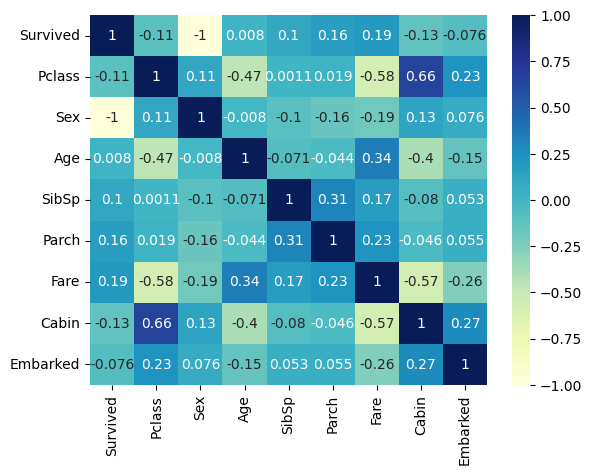

In [45]:

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 



In [46]:
cor = data.corr()

cor_target = abs(cor["Survived"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Survived    1.000000
Pclass      0.108615
Sex         1.000000
SibSp       0.099943
Parch       0.159120
Fare        0.192036
Cabin       0.127938
Embarked    0.076281
Name: Survived, dtype: float64

In [47]:
X = data.drop('Survived', axis = 1)
Y = data['Survived']

# Feature importance based on P value

In [48]:
import numpy as np
from scipy.stats import ttest_ind
for col in X.columns:
    res = ttest_ind(X[col], Y).pvalue
    print("P_value  = ",col," = ",res)

P_value  =  Pclass  =  1.0254858142198174e-196
P_value  =  Sex  =  1.003860903939147e-15
P_value  =  Age  =  1.0090529148348856e-236
P_value  =  SibSp  =  0.09298436553010889
P_value  =  Parch  =  0.5914916530946203
P_value  =  Fare  =  8.463922625939653e-35
P_value  =  Cabin  =  0.0
P_value  =  Embarked  =  8.849847949819531e-83


In [49]:
data["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

# Balancing Classes

In [50]:
smote = SMOTE(random_state = 42)
X_balanced, y_balanced = smote.fit_resample(X, Y)

In [51]:
y_balanced.value_counts()

Survived
0    266
1    266
Name: count, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.3, random_state = 42) 

# Scalling the features

In [53]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Applying ANN algorithm

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# define the model
model = Sequential()

model.add(Dense(8,  activation = 'relu',input_shape=(8,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [55]:
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [56]:
hist= model.fit(X_train_scaled, y_train, epochs=120, verbose=2)


Epoch 1/120
12/12 - 1s - loss: 0.6959 - accuracy: 0.5108 - 919ms/epoch - 77ms/step
Epoch 2/120
12/12 - 0s - loss: 0.6433 - accuracy: 0.7419 - 23ms/epoch - 2ms/step
Epoch 3/120
12/12 - 0s - loss: 0.5995 - accuracy: 0.8737 - 25ms/epoch - 2ms/step
Epoch 4/120
12/12 - 0s - loss: 0.5537 - accuracy: 0.8952 - 23ms/epoch - 2ms/step
Epoch 5/120
12/12 - 0s - loss: 0.5027 - accuracy: 0.8952 - 22ms/epoch - 2ms/step
Epoch 6/120
12/12 - 0s - loss: 0.4473 - accuracy: 0.9059 - 23ms/epoch - 2ms/step
Epoch 7/120
12/12 - 0s - loss: 0.3847 - accuracy: 0.9220 - 21ms/epoch - 2ms/step
Epoch 8/120
12/12 - 0s - loss: 0.3231 - accuracy: 0.9301 - 23ms/epoch - 2ms/step
Epoch 9/120
12/12 - 0s - loss: 0.2656 - accuracy: 0.9435 - 22ms/epoch - 2ms/step
Epoch 10/120
12/12 - 0s - loss: 0.2140 - accuracy: 0.9597 - 22ms/epoch - 2ms/step
Epoch 11/120
12/12 - 0s - loss: 0.1707 - accuracy: 0.9704 - 21ms/epoch - 2ms/step
Epoch 12/120
12/12 - 0s - loss: 0.1358 - accuracy: 0.9758 - 22ms/epoch - 2ms/step
Epoch 13/120
12/12 - 0s

In [57]:
train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Train Accuracy : " ,train_acc )

Train Accuracy :  1.0


In [58]:
print("Test Accuracy : " ,test_acc )


Test Accuracy :  0.9937499761581421
